# Семинар 6.
## Часть 1. Повторение пройденного

### Что мы узнали по прошествии половины курса?

- Какие форматы представления чисел в компьютере существуют и как устроена память в компьютере
- Основные операции с матрицами и векторами, сложность их вычисления и частные случаи
- Матричные разложения: SVD, скелетное разложение, LU/Холецкий, QR, разложение Шура
- Приложения SVD
- Вычисление собственных значений и собственных векторов: QR алгоритм и степенной метод
- Алгоритмы вычисления SVD (узнаем в следующий раз)

## Singular value decomposition (SVD)

- Представление матрицы в виде

$$ A = U\Sigma V^*,$$

- $U$ и $V$ – унитарные
- $\Sigma$ – диагональная

- Существует для **любой** матрицы
- Позволяет получить наилучшее малоранговое приближение матрицы в спектральной и Фробениусовой нормах (теорема Эккарта-Янга)
- Как оценивается ошибка аппроксимации для этих норм?

## Задача 1: решение системы линейных уравнений

$$ Ax = b $$

- LU разложение/разложение Холецкого
- Задача наименьших квадратов и compressed sensing

###  Случай 1: матрица квадратная

Решение системы линейных уравнений с квадратной матрицей $A$

$$A x = b$$

существует тогда и только тогда, когда матрица невырождена, то есть
* $\det A \ne 0$
* матрица $A$ имеет полный ранг
* существует $A^{-1}$.

### Как решать?

- Метод Гаусса или LU разложение

**Определение**: LU разложение матрицы $A$ – это представление

$$A =  LU,$$

где $L$ – **нижнетреугольная** и $U$ – **верхнетреугольная** матрица.

- Проход вперёд и проход назад в методе Гаусса
    - Проход вперёд эквивалентен

    $$ L y = f.$$

    - Аналогично для прохода назад
    
    $$ U x = y.$$

Всегда ли существует $LU$ разложение?
- Сложность $\mathcal{O}(n^3)$
- **Q:** можно ли уменьшить степень?
- Проблемы с устойчивостью и строго регулярные матрицы

### Выбор ведущего элемента в строке (pivoting)

- Уже для любой матрицы существует PLU разложение

$$ A = PLU, $$

где $P$ – матрица перестановки.

- Какая сложность?
- Как с помощью такого разложения решить линейную систему?

### Если матрица эрмитова и положительно определённая

Эрмитова положительно определённая матрица $A$ строго регулярна и имеет **разложение Холецкого** вида

$$A = RR^*,$$

где $R$ нижнетреугольная матрица.

Часто матрица $R$ называется "квадратным корнем" матрицы $A$. 

### Устойчивость решения линейной системы

- Поведение алгоритмов в точной и машинной арифметике **принципиально различаются**!
- Для решения линейных систем введено понятие **числа обусловленности** матрицы

$$\mathrm{cond}(A) = \Vert A \Vert \Vert A^{-1} \Vert.$$

- С его помощью можно оценить

$$ \frac{\Vert \widehat{x} - x \Vert}{\Vert x \Vert} \leq \mathrm{cond}(A) \Big(\frac{\Vert\Delta A\Vert}{\Vert A \Vert} + \frac{\Vert \Delta f \Vert}{ \Vert f \Vert}\Big),$$

где $(A + \Delta A) \widehat{x} = f + \Delta f.$

### Концепция предобусловливателя

- Вместо решения системы $Ax = b$ будем решать систему $PAx = Pb$
- Но число обусловленности $PA$ сильно меньше, чем у матрицы $A$!
- **Q:** какая матрица $P$ идеальная с точки зрения минимизации числа обусловленности?
- Далее в курсе подробно обсудим конкретные примеры и следствия использования такого подхода

### Случай 2: матрица неквадратная

- строк больше, чем столбцов – переопределённая система
    - решение может не существовать
- строк меньше, чем столбцов – недоопределённая система
    - решение неединственное

### Задача наименьших квадратов

$$\Vert A x - b \Vert^2_2 \rightarrow \min_x$$

- Геометрическая интерпретация
- Стандартная задача: нужно вызвать функцию из библиотеки

## Матрица Грама и нормальное уравнение

- Из условия оптимальности первого порядка получим нормальное уравнение

$$
A^* A x = A^* b
$$

Матрица $A^* A$ называется **матрицей Грама**.

Свойства нормального уравнения:

- Число обусловленности матрицы $A^* A$ равно квадрату числа обусловленности матрицы $A$ (проверьте!).
- Поэтому решать нормальное уравнение в таком виде – не самая хорошая идея!

### Псевдообратная матрица

- Если матрица $A$ неполного ранга, то матрица Грама – вырождена
- Поэтому введём понятие псевдообратной матрицы  $A^{\dagger}$

$$x = A^{\dagger} b.$$

- Матрица 

$$A^{\dagger} = \lim_{\alpha \rightarrow 0}(\alpha I + A^* A)^{-1} A^*$$ 

называется псевдообратной матрицей Мура-Пенроуза для матрицы $A$.

#### Свойства псевдообратной матрицы

* Если матрица $A$ имеет полный ранг, тогда $A^* A$ невырождена, и мы получим 

$$A^{\dagger} = \lim_{\alpha \rightarrow 0}(\alpha I + A^* A)^{-1} A^* = (A^* A)^{-1} A^*.$$

* Если матрица $A$ квадратная и невырожденная, мы получим 

$$ A^{\dagger} = \lim_{\alpha \rightarrow 0}(\alpha I + A^* A)^{-1} A^* = (A^* A)^{-1} A^* = A^{-1} A^{-*} A^* = A^{-1}$$

Получили обычную обратную матрицу для $A$

* Если $A$ имеет линейно зависимые столбцы, тогда $A^\dagger b$ даёт решение минимальной евклидовой нормы – вспоминаем геометрию задачи! 

### Вычисление псевдообратной матрицы с помощью SVD

Пусть $A = U \Sigma V^*$ SVD для матрицы $A$. Тогда,

$$A^{\dagger} = V \Sigma^{\dagger} U^*,$$

где $\Sigma^{\dagger}$ состоит из обращённых ненулевых сингулярных чисел матрицы $A$. Действительно,

\begin{align*}
A^{\dagger} = \lim_{\alpha \rightarrow 0}(\alpha I + A^* A)^{-1} A^* = \lim_{\alpha \rightarrow 0}( \alpha VV^* + V \Sigma^2 V^*)^{-1} V \Sigma U^* = \lim_{\alpha \rightarrow 0}( V(\alpha I + \Sigma^2) V^*)^{-1} V \Sigma U^* = V \lim_{\alpha \rightarrow 0}(\alpha I + \Sigma^2)^{-1} \Sigma U^* = V \Sigma^{\dagger} U^*,
\end{align*}

* Вы можете проверить, что $\Sigma^{\dagger}$ состоит из обращённых ненулевых сингулярных чисел <br>
* Если сингулярные числа малы, их можно не обращать. Это даст решение менее чувствительное к шуму в правой части

**Q:** что произошло с числом обусловленности?

### Для решения задачи используем QR разложение 

Любая матрица может быть представлена в виде 

$$
A = Q R,
$$
где $Q$ – унитарная матрица, и $R$ – верхнетреугольная.

- Ортогонализация Грама-Шмидта неустойчива
- Модифицрованный алгоритм устойчив

- Вычисление с помощью отражений Хаусхолдера. Это преобразование зануляет подвектор

$$
    H \begin{bmatrix} \times \\ \times \\ \times \\ \times  \end{bmatrix} = 
      \begin{bmatrix} \times \\ 0 \\ 0 \\ 0  \end{bmatrix}.
$$

- Матрица Хаусхолдера 

$$ H = I - 2 vv^*. $$

Сложность умножения на вектор $\mathcal{O}(n)$!

- Сложность вычисления QR разложения – $\mathcal{O}(n^3)$
- Какая сложность для матрицы $m \times n,$ где $m > n$?

- Вычисление с помощью вращения Гивенса
- Матрица Гивенса в 2D имеет вид

$$
    G = \begin{bmatrix}
          \cos \alpha & -\sin \alpha \\
          \sin \alpha & \cos \alpha
        \end{bmatrix},
$$
- Последовательное зануление элементов
- Подходит для разреженных матриц и параллельных архитектур

### Возвращаемся к задаче наименьших квадратов

Тогда если $A$ имеет полный ранг, то

$$
x = A^{\dagger}b = (A^*A)^{-1}A^*b = ((QR)^*(QR))^{-1}(QR)^*b = (R^*Q^*QR)^{-1}R^*Q^*b = R^{-1}Q^*b. 
$$ 

Таким образом, необходимо решить следующую квадратную систему 

$$
Rx = Q^* b.
$$

- $R$ верхнетреугольная
- Решение требует $\mathcal{O}(n^2)$ операций
- Более устойчивый способ, чем использование псевдообратной матрицы напрямую

### Альтернатива для недоопределённой системы: compressed sensing

- Альтернативным способов определения единственности решения является задача минимизации его первой нормы

\begin{align*}
& \Vert x \Vert_1 \rightarrow \min_x \\
\mbox{s.t.  } & Ax = f
\end{align*}

- Решается специальными методами оптимизации
- Ожидается получение разреженного решения

### Всегда ли решение будет разреженным?

In [9]:
import numpy as np

eps = 1e-3
n = 10
b = np.ones(n)
A = np.zeros((n, n+2))
A[:, 2:] = np.eye(n)
A[:, :2] = eps / 2.
A[0, 0] += 1
A[1, 1] += 1
A[0, 1] -= 1
A[1, 0] -= 1
c = 1. / np.linalg.norm(A[:, 0])
A[:, 0] = A[:, 0] / np.linalg.norm(A[:, 0])
A[:, 1] = A[:, 1] / np.linalg.norm(A[:, 1])
print(A)

[[ 7.07459892e-01 -7.06752786e-01  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-7.06752786e-01  7.07459892e-01  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.53553170e-04  3.53553170e-04  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.53553170e-04  3.53553170e-04  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.53553170e-04  3.53553170e-04  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.

In [12]:
x1 = np.zeros(n+2)
x1[2:] = 1
print(np.linalg.norm(A @ x1 - b), np.linalg.norm(x1, 1))
print(np.sum(x1 != 0))

0.0 10.0
10


In [13]:
x2 = np.zeros(n+2)
x2[:2] = 1
x2 = x2 / (eps * c)
print(np.linalg.norm(A @ x2 - b), np.linalg.norm(x2, 1))
print(np.sum(x2 != 0))

0.0 2828.4288925125907
2


### Почему так получилось?

## Задача 2: вычисление собственных векторов и собственных значений

$$ Ax = \lambda x, \qquad A = S \Lambda S^{-1} $$

- Степенной метод
- QR алгоритм

### Теоретический подход

- Характеристическое уравнение

$$ \det(A - \lambda I) = 0 $$

- Решение через вычисление коэффицентов полинома и нахождения его нулей
- Очень неустойчивая операция! 
- Почему?

### Практический подход: частичная задача на собственные векторы

- Степенной метод и блочный степенной метод
- Одна итерация

$$ x_{k+1} = A x_k, \quad x_{k+1} := \frac{x_{k+1}}{\Vert x_{k+1} \Vert_2}.$$

- Сходится к максимальному по модулю собственному значению
- Для выполнения итераций достаточно иметь функцию умножения матрицы на вектор!

**Q:** какая сложность?

- Скорость сходимости – линейная (геометрическая прогрессия), константа $q = \left|\frac{\lambda_{2}}{\lambda_{1}}\right| < 1$, где $\lambda_1>\lambda_2\geq\dots\geq \lambda_n$.
- Не сходится, если $\lambda_1 = \bar{\lambda}_2$

### Крыловское пространство

- Собственный вектор, полученный степенным методом, лежит в **Крыловском подпространстве** $\{x_0, Ax_0,\dots,A^{k}x_0\}$ и имеет вид $\mu A^k x_0$, где $\mu$ нормировочная постоянная. 
- Далее Крыловские пространства будут играть **ключевую роль** для задач большой размерности!
- Подробности через лекцию...

### Практический подход: полная задача на собственные векторы

- Ищем весь спектр!
- Разложение Шура

$$A = UTU^*,$$ 

где $U$ унитарная, а $T$ верхнетреугольная.

- Спектр $T$ и $A$ совпадает в силу унитарности $U$
- Как вычислить разложение Шура?  

###  QR алгоритм
1. Инициализируем $A_0 = A$.
2. Вычислим QR разложение матрицы $A_k$: $A_k = Q_k R_k$.
3. Обновим аппроксимацию $A_{k+1} = R_k Q_k$.


- Как проверить сходимиость?
- Какая сложность?
- Как найти матрицы $U$ и $T$?

### Сходимость и ускорение

- Ускорим QR алгоритм до $\mathcal{O}(n^3)$
- Используем свойства матриц в **верхне-гессенберговой форме**
- Матрица $A$ представлена в верхне-гессенберговой форме, если

$$a_{ij} = 0, \quad \mbox{if } i \geq j+2.$$

или 

$$A = \begin{bmatrix} * & * & * & * & * \\ * & * & * & * & * \\ 0 & * & * & * & *\\ 0 & 0 & * & * & *\\ 0 & 0 & 0 & * & * \\ \end{bmatrix}.$$

- Подробности на следующей лекции...

## Задача 3: вычисление матричных функций

$$ B = f(A) = \sum_{k=0}^{\infty} c_k A^k$$

- Это не поэлементная функция
- Нужно уметь вычислять ряд
- Устойчивость

## Вычисление степени матрицы

- Дана матрица $A$
- Нужно вычислить $A^k$
- Это необходимо при вычисление матричных функций, которые представляются в виде матричного ряда

### Используем спектральное разложение

- $A = U\Lambda U^{-1}$
- Тогда $A^k = U \Lambda^k U^{-1}$

### Матричная экспонента: знакомство или напоминание

$$\exp(A) = \sum_{k=0}^{\infty} \frac{A^k}{k!} $$

- Про матричные функции будет отдельное занятие!
- Важно! Чаще нужно не само значение матричной экспоненты, а результат её умножения на некоторый вектор $v$: 

$$ \exp(A)v $$

- Это позволяет разработать быстрые методы для вычисления произведения, не считая саму матричную экспоненту!

In [24]:
import scipy.linalg as splin
import matplotlib.pyplot as plt
plt.rc("text", usetex=True)
%matplotlib inline 

n = 7
A = np.random.randn(n, n)
A = A + A.T
print(np.linalg.norm(A))
expA = splin.expm(A)
print(expA.round(4))

10.14557721316647
[[  88.1374  -20.1911   -4.2125    3.0542    6.2766   -1.0849  -28.8463]
 [ -20.1911   18.0428   -5.4419   41.6549  -13.4495  -18.449    24.4322]
 [  -4.2125   -5.4419   21.6938  -53.9761   40.6681    2.6968  -33.6354]
 [   3.0542   41.6549  -53.9761  204.2881 -105.3993  -51.6985  108.6377]
 [   6.2766  -13.4495   40.6681 -105.3993   80.2581    6.1887  -70.7844]
 [  -1.0849  -18.449     2.6968  -51.6985    6.1887   30.0549  -17.7194]
 [ -28.8463   24.4322  -33.6354  108.6377  -70.7844  -17.7194   74.2981]]


In [25]:
def qr_algorithm(A, num_iter, eps):
    T = A.copy()
    U = np.eye(A.shape[0])
    conv = [(T, U)]
    for i in range(num_iter):
        Q, R = np.linalg.qr(T)
        T = R @ Q
        U = U @ Q
        conv.append((T, U))
        if np.sum(np.abs(np.tril(T, k=-1))) < eps:
            break
    return T, U, conv[1:]

In [26]:
T, U, conv = qr_algorithm(A, 2000, 1e-6)
print(np.linalg.norm(A - U @ T @ U.T))

1.0675878641639698e-13


In [27]:
cur_term = np.eye(n)
expA_approx = np.eye(n)
K = 50
denom = 1.
conv = [expA_approx]
for i in range(1, K):
    denom = denom * i
    cur_term = U @ T**i @ U.T / denom
    expA_approx = expA_approx + cur_term
    conv.append(expA_approx)
print(expA_approx.round(4))
print(np.linalg.norm(expA_approx - expA))

[[  88.1374  -20.1911   -4.2125    3.0542    6.2766   -1.0849  -28.8463]
 [ -20.1911   18.0428   -5.4419   41.6549  -13.4495  -18.449    24.4322]
 [  -4.2125   -5.4419   21.6938  -53.9761   40.6681    2.6968  -33.6354]
 [   3.0542   41.6549  -53.9761  204.2881 -105.3993  -51.6985  108.6377]
 [   6.2766  -13.4495   40.6681 -105.3993   80.2581    6.1887  -70.7844]
 [  -1.0849  -18.449     2.6968  -51.6985    6.1887   30.0549  -17.7194]
 [ -28.8463   24.4322  -33.6354  108.6377  -70.7844  -17.7194   74.2981]]
1.3182919857724327e-05


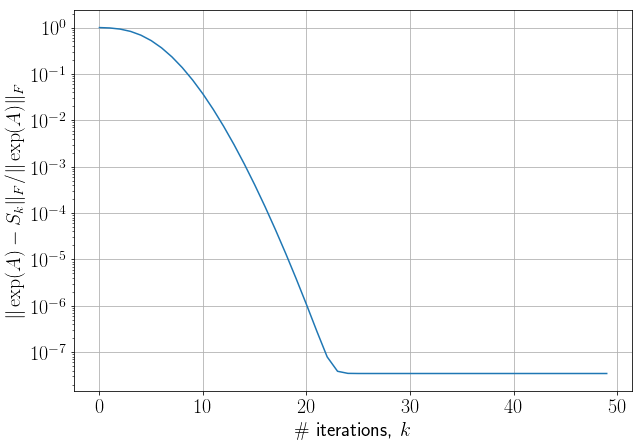

In [28]:
plt.figure(figsize=(10, 7))
plt.plot([np.linalg.norm(expA - approx, "fro") / np.linalg.norm(expA) for approx in conv])
plt.yscale("log")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("\# iterations, $k$", fontsize=20)
plt.ylabel("$\|\exp(A) - S_k \|_F / \|\exp(A)\|_F$", fontsize=20)
plt.grid(True)

## Что нас ждёт дальше?

- Те же задачи, но для матриц большого и очень большого размера
- Активное использование структуры матриц
    - разреженность
    - малоранговость
    - Тёплицевы матрицы и циркулянты
- Итерационные методы для
    - решения линейных систем
    - вычисления собственных значений и векторов
    - вычисления матричных функций
- Тензорные разложения и их приложения

## Часть 2. Что ожидается увидеть на презентации проектов

### Постановка задачи

- Почему эта задача важна?
- Основные обозначения
- Как задача формально записывается? 
- Критерий качества

### Методы решения

- Какие методы вы используете для её решения?
- Что из материалов курса вам было нужно для решения задачи?
- Описание алгоритмов

### Результаты

- Графики
    - Читаемые оси и подписи к осям
    - Понятная легенда
    - Отличимые линии
- Таблицы
    - Выделенные ячейки, на которые надо смотреть
    - Понятные наименования строк/столбцов
- Картинки

## Анонс следующего занятия

- 2 лекции
- Способы вычисления SVD – последняя тема про плотные неструктурированные матрицы 
- Разреженные матрицы и прямые методы решения линейных систем с разреженными матрицами